# Hello! Welcome to our Jupyter Notebook!

### See below our code for our final project in Stat 121a. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [3]:
df = pd.read_csv("msa_murder_data.csv")

# EDA

### lm plots of race variables

In [ ]:
#white
c=sns.lmplot(x="white_pct", y="Murder_Rate", data=data)
d=sns.lmplot(x="white_pct", y="Murder_Rate", hue = 'Year', data=data)
#g.set(xlim=(0, 0.00005), ylim =(-0.01,1.01))

In [ ]:
#latino
e=sns.lmplot(x="latino_pct", y="Murder_Rate", data=data)
f=sns.lmplot(x="latino_pct", y="Murder_Rate", hue = 'Year', data=data)
#g.set(xlim=(0, 0.00005), ylim =(-0.01,1.01))

In [ ]:
##regression plots of predictor variables
#black
a=sns.lmplot(x="black_pct", y="Murder_Rate", data=data)
b=sns.lmplot(x="black_pct", y="Murder_Rate", hue = 'Year', data=data)
#g.set(xlim=(0, 0.00005), ylim =(-0.01,1.01))






### Bar charts

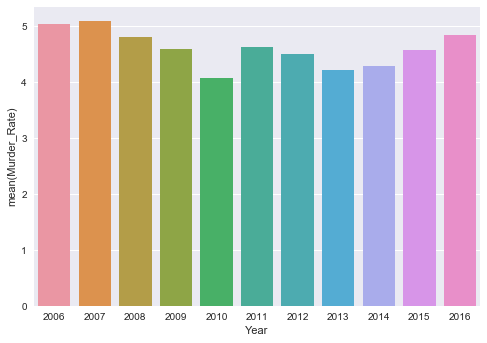

In [4]:
###bar chart of the average murder rate by year
year = pd.pivot_table(df, index=["Year"]).reset_index()
sns.barplot(x="Year", y="Murder_Rate", data=year)

In [5]:
#def a functin to get the state from the msa
def get_state(msa):
    s = re.search(re.compile(" [A-Z]{2} "), msa)
    if s:
        return(s[0])
    else:
        return(None)

df["State"] = df["MSA"].map(get_state)

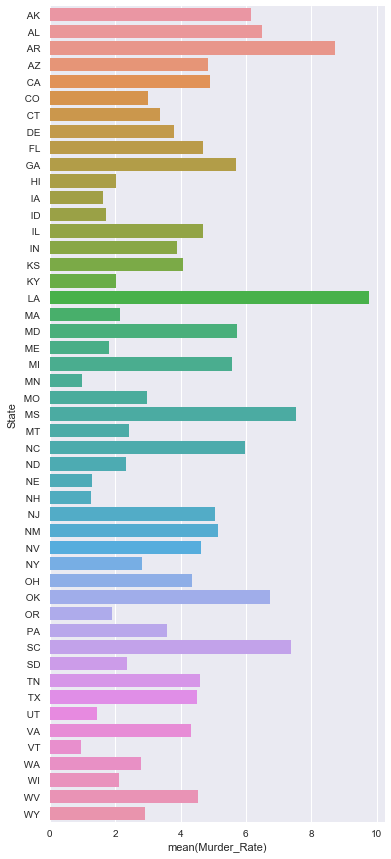

In [7]:
###Sideways bar chart of the mean murder rate by state
st = pd.pivot_table(df, index=["State"]).reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Murder_Rate", y="State", data=st)

### Bivariate Plots


In [13]:
#read in data, calculate percent married, and start making bi-variate charts for the EDA

df = pd.read_csv("merged_df.csv", encoding='Latin1')
df=df.replace('N',np.NaN)
df['pct_married']=pd.to_numeric(df["pct_married"])
df = df.loc[df["Year"] != 2016]
df["pct_married"] = df["pct_married"].map(lambda x: x*100 if x < 1 else x)

df.head()

,MSA,Murder_Rate,Year,MSA_Match,Unnamed: 0,msa,total_pop,white,black,latino,subsidy_pct,pct_married,median_income,median_age,median_age_m,median_age_f
0,"Abilene, TX1",3.7,2006,"Abilene, TX",0.0,"Abilene, TX Metro Area",158548.0,111584.0,10561.0,30992.0,0.097093,50.9,39784.0,34.4,32.5,36.5
1,"Albany, GA",6.5,2006,"Albany, GA",3.0,"Albany, GA Metro Area",165062.0,NaN,NaN,NaN,0.160437,46.1,35515.0,34.3,31.2,36.3
2,"Albany-Schenectady-Troy, NY",2.1,2006,"Albany-Schenectady-Troy, NY",4.0,"Albany-Schenectady-Troy, NY Metro Area",850957.0,725185.0,56644.0,25787.0,0.070040,48.1,53202.0,38.2,36.7,39.6
3,"Albuquerque, NM",8.9,2006,"Albuquerque, NM",5.0,"Albuquerque, NM Metro Area",815430.0,364701.0,20353.0,358573.0,0.082469,47.2,44799.0,35.7,34.6,36.9
4,"Alexandria, LA",7.1,2006,"Alexandria, LA",6.0,"Alexandria, LA Metro Area",150827.0,NaN,NaN,NaN,0.125644,46.3,34966.0,36.1,34.0,38.2




Next, we subset the data to make binned bivariate regression plots of the predictors we targeted in our EDA

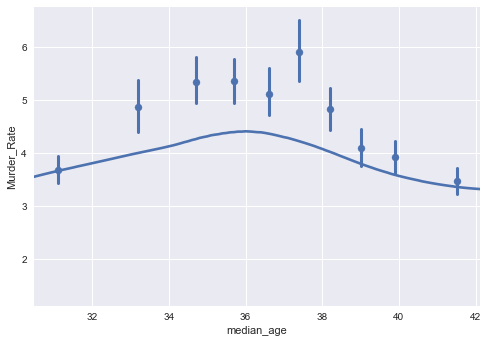

In [19]:
#age
df2 = df[["median_age", "Murder_Rate"]]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(how="all")
sns.regplot(x="median_age", y="Murder_Rate", x_bins = 10, data=df2,
           lowess=True)

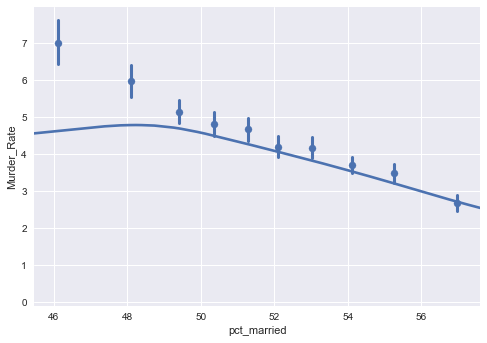

In [20]:
df2 = df[["pct_married", "Murder_Rate"]]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(how="all")
sns.regplot(x="pct_married", y="Murder_Rate", x_bins = 10, data=df2,
           lowess=True)

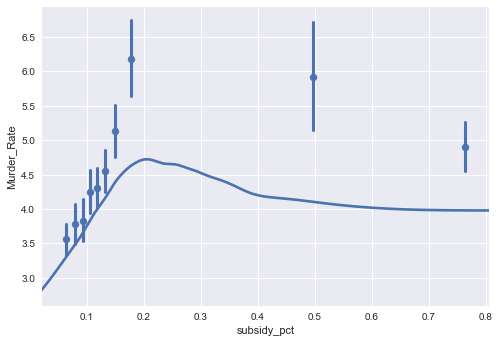

In [21]:
df2 = df[["subsidy_pct", "Murder_Rate"]]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(how="all")
sns.regplot(x="subsidy_pct", y="Murder_Rate", x_bins = 10, data=df2,
           lowess=True)

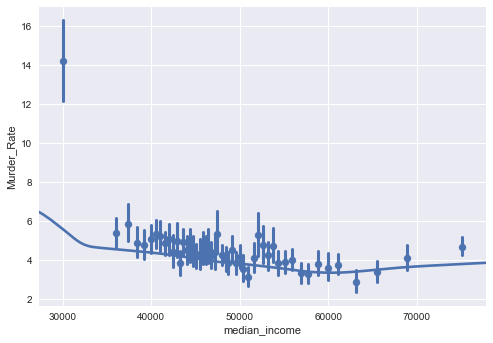

In [22]:
df2 = df[["median_income", "Murder_Rate"]]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(how="all")
sns.regplot(x="median_income", y="Murder_Rate", x_bins = 50, data=df2,
           lowess=True)

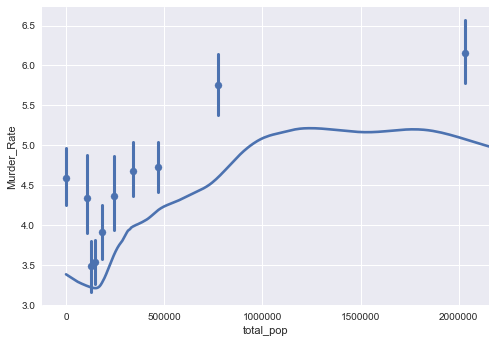

In [25]:
df2 = df[["total_pop", "Murder_Rate"]]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(how="all")
sns.regplot(x="total_pop", y="Murder_Rate", x_bins = 10, data=df2,
           lowess=True)

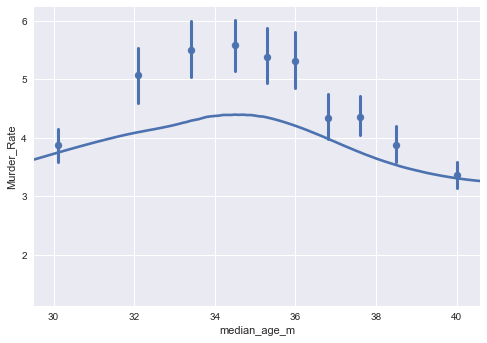

In [26]:
df2 = df[["median_age_m", "Murder_Rate"]]
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(how="all")
sns.regplot(x="median_age_m", y="Murder_Rate", x_bins = 10, data=df2,
           lowess=True)

#### End of EDA

# Baseline Models

In [29]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from scipy import stats

import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
sns.set(style="ticks")
%matplotlib inline



#sets up pandas table display
%matplotlib inline

In [30]:
data = pd.DataFrame(pd.read_csv('merged_df.csv', encoding='latin-1'))
data.head()
data= data.drop('subsidy_pct', axis = 1)

In [31]:
#recode some of the variables

data['black_pct'] = np.divide(data['black'].values, data['total_pop'].values)
data['white_pct'] = np.divide(data['white'].values, data['total_pop'].values)
data['latino_pct'] = np.divide(data['latino'].values, data['total_pop'].values)

#discard MSA's with total population measurement error (n-4)
data.loc[(data['total_pop'] <= 1000) & (data['total_pop'] > 0)][['total_pop']] 
data = data[data.total_pop >= data.black]
np.amax(data[['black_pct']].values[np.isfinite(data[['black_pct']].values)])
data=data.replace('N',np.NaN)


### Prep data for analysis

In [32]:
####make training and test
np.random.seed(2138)
msk = np.random.rand(len(data)) < 0.5
data_train = data[msk]
data_test = data[~msk]
print(data_train.shape)
print(data_train.shape)

(1524, 18)
(1524, 18)


#### Split data into predictors and outcome variables

For the baseline models, we include total population, percent married, median income, median age for both males and females, and percentage of the population that is White, Black, and Latino. We leave out our key variables of interested at this point to lay a baseline.

In [33]:
#make xtrain and ytrain, we drop the MSA name and Years 
#from the baseline model because we do not want this baseline to hve
#fixed effects. We also separate overall median age into male/female

predictors = ['total_pop', 'pct_married',
       'median_income', 'median_age_m', 'median_age_f',
       'black_pct', 'white_pct', 'latino_pct']
xtrain = data_train[predictors].copy(deep=True)
ytrain = data_train[['Murder_Rate']].copy(deep=True)


xtest = data_test[predictors].copy(deep=True)
ytest = data_test[['Murder_Rate']].copy(deep=True)
type(xtrain)
type(xtest)

pandas.core.frame.DataFrame

#### We impute the mean of each variable into the columns that are NA

In [34]:
#imputer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(xtrain)

# Impute our data, then train
xtrain = imp.transform(xtrain)

imp = imp.fit(xtest)

# Impute our data, then train
xtest = imp.transform(xtest)

xtrain = pd.DataFrame(xtrain)
xtrain.columns = predictors
xtest = pd.DataFrame(xtest)
xtest.columns = predictors



#### We standardize all predictors so we can better compare the coefficients

In [35]:
#Next, we standardize all predictors so we can assess their relative changes 
#independent of their scales
def standardize(vector):
    vector = np.array(vector)
    x_mean = np.mean(vector)
    x_max = np.amax(vector)
    x_min = np.amin(vector)
    return(np.array((vector-x_min)/(x_max-x_min)))

xtrain = xtrain.apply(standardize, axis = 0)
xtest = xtest.apply(standardize, axis = 0)


## OLS Model 

In [41]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(xtrain, ytrain)
ols_rsq_train = ols_model.score(xtrain, ytrain)
ols_rsq_test = ols_model.score(xtest, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(xtest)
trainpreds =ols_model.predict(xtrain)
ols_mse_train = np.mean((ytrain - ols_model.predict(xtrain))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(xtest))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)

##results
ols_coefs = pd.DataFrame({
    "Predictors" : predictors,
   "Coef" : ols_fit.coef_[0],
    
})
ols_coefs.sort_values('Coef', ascending=False)


OLS Train R-Squared:  0.367247848982
OLS Test R-Squared:  0.379832801901
OLS Train MSE:  Murder_Rate    10.263115
dtype: float64
OLS Test MSE:  Murder_Rate    8.164301
dtype: float64


,Coef,Predictors
5,7.959908,black_pct
4,5.233634,median_age_f
7,3.672175,latino_pct
0,3.385233,total_pop
1,0.900511,pct_married
3,-1.130752,median_age_m
6,-4.041169,white_pct
2,-7.456676,median_income


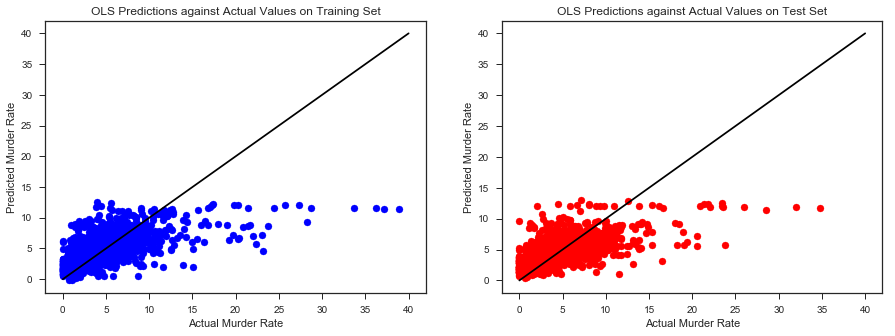

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

In [43]:
#boot strap to get standard errors:
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    ols_model = LinearRegression(fit_intercept = True)
    ols_fit = ols_model.fit(xsamp, ysamp)


    ##results
    boots.append(ols_fit.coef_[0])
    i = i+1



In [44]:
def pvalue(t, df):
    return((1 - stats.t.cdf(t,df=df))*2)

pvalue(1.96, 1000)
    

0.050273184955748729

In [45]:
bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



ols_coefs = ols_coefs.merge(se_df, how='outer', on='Predictors')
ols_coefs['t'] = np.abs(np.divide(ols_coefs['Coef'].values, ols_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
ols_coefs['p-value'] = ols_coefs['t'].map(lambda x: pvalue(x, df)) 
ols_coefs

,Coef,Predictors,SE,t,p-value
0,3.385233,total_pop,1.122228,3.016529,2.599426e-03
1,0.900511,pct_married,0.161310,5.582499,2.804708e-08
2,-7.456676,median_income,1.161565,6.419508,1.824108e-10
3,-1.130752,median_age_m,7.139585,0.158378,8.741802e-01
4,5.233634,median_age_f,6.570074,0.796587,4.258158e-01
5,7.959908,black_pct,0.530605,15.001577,0.000000e+00
6,-4.041169,white_pct,0.606749,6.660364,3.809331e-11
7,3.672175,latino_pct,1.208777,3.037926,2.422815e-03


## Ridge Regression Model

In [46]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(xtrain, ytrain)
ridge_rsq_train = ridge_model.score(xtrain, ytrain)
ridge_rsq_test = ridge_model.score(xtest, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(xtest)
trainpreds =ridge_model.predict(xtrain)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(xtrain))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(xtest))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)
##results
ridge_coefs = pd.DataFrame({
    "Predictors" : predictors,
   "Coef" : ridge_fit.coef_[0],
    
})
ridge_coefs.sort_values('Coef', ascending=False)



Ridge Train R-Squared:  0.366913071035
Ridge Test R-Squared:  0.380031028514
Ridge Train MSE:  Murder_Rate    10.268545
dtype: float64
Ridge Test MSE:  Murder_Rate    8.161692
dtype: float64


,Coef,Predictors
5,7.876591,black_pct
7,3.587509,latino_pct
4,3.012068,median_age_f
0,3.001881,total_pop
3,1.036174,median_age_m
1,0.891797,pct_married
6,-4.093827,white_pct
2,-7.188728,median_income


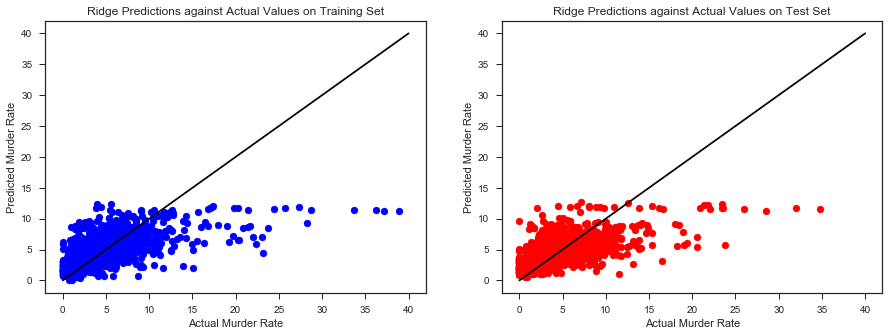

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

In [48]:
#boot strap to get standard errors:
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    ridge_model = RidgeCV(fit_intercept = True)
    ridge_fit = ridge_model.fit(xsamp, ysamp)


    ##results
    boots.append(ridge_fit.coef_[0])
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



ridge_coefs = ridge_coefs.merge(se_df, how='outer', on='Predictors')
ridge_coefs['t'] = np.abs(np.divide(ridge_coefs['Coef'].values, ridge_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
ridge_coefs['p-value'] = ridge_coefs['t'].map(lambda x: pvalue(x, df)) 
ridge_coefs.sort_values('Coef', ascending=False)
ridge_coefs


,Coef,Predictors,SE,t,p-value
0,3.001881,total_pop,1.128268,2.660610,7.882211e-03
1,0.891797,pct_married,0.361379,2.467765,1.370570e-02
2,-7.188728,median_income,1.117306,6.433980,1.662710e-10
3,1.036174,median_age_m,4.102507,0.252571,8.006341e-01
4,3.012068,median_age_f,4.233011,0.711566,4.768428e-01
5,7.876591,black_pct,0.690507,11.406962,0.000000e+00
6,-4.093827,white_pct,0.859369,4.763760,2.082036e-06
7,3.587509,latino_pct,0.872634,4.111129,4.148250e-05


## Lasso Model

In [49]:
## Lasso Regression
#xtrain = xtrain.drop('Murder_Rate', axis=1)
from sklearn.linear_model import LassoCV
#
lasso_model = LassoCV(fit_intercept = True, cv=4)
lasso_fit = lasso_model.fit(xtrain, ytrain)
lasso_rsq_train = lasso_model.score(xtrain, ytrain)
lasso_rsq_test = lasso_model.score(xtest, ytest)
print("Lasso Train R-Squared: ",  lasso_rsq_train)
print("Lasso Test R-Squared: ",  lasso_rsq_test)
testpreds = lasso_model.predict(xtrain)
trainpreds = lasso_model.predict(xtrain)
lasso_mse_train = np.mean((ytrain.values - testpreds)**2)
lasso_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Lasso Train MSE: ",  lasso_mse_train)
print("Lasso Test MSE: ",  lasso_mse_test)

lasso_coefs = pd.DataFrame({
   "Coef" : lasso_model.coef_,
    "Predictors" : predictors,
    
})
# note that the parameter for median age has shrunk to zero
lasso_coefs.sort_values('Coef', ascending=False)

Lasso Train R-Squared:  0.367189189571
Lasso Test R-Squared:  0.380200786365
Lasso Train MSE:  22.1081257723
Lasso Test MSE:  19.0620036403


,Coef,Predictors
5,7.949720,black_pct
4,4.075431,median_age_f
7,3.631344,latino_pct
0,3.216030,total_pop
1,0.892238,pct_married
3,0.000000,median_age_m
6,-4.065517,white_pct
2,-7.412734,median_income


In [50]:
#boot strap to get standard errors:
import warnings; warnings.simplefilter('ignore')
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    lasso_model = LassoCV(fit_intercept = True)
    lasso_fit = lasso_model.fit(xsamp, ysamp)


    ##results
    boots.append(lasso_fit.coef_)
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



lasso_coefs = lasso_coefs.merge(se_df, how='outer', on='Predictors')
lasso_coefs['t'] = np.abs(np.divide(lasso_coefs['Coef'].values, lasso_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
lasso_coefs['p-value'] = lasso_coefs['t'].map(lambda x: pvalue(x, df)) 
lasso_coefs.sort_values('Coef', ascending=False)
lasso_coefs

,Coef,Predictors,SE,t,p-value
0,3.216030,total_pop,0.890867,3.610000,0.000316
1,0.892238,pct_married,0.312845,2.852010,0.004403
2,-7.412734,median_income,1.821815,4.068872,0.000050
3,0.000000,median_age_m,3.120484,0.000000,1.000000
4,4.075431,median_age_f,3.168660,1.286169,0.198581
5,7.949720,black_pct,0.773019,10.283985,0.000000
6,-4.065517,white_pct,1.065860,3.814307,0.000142
7,3.631344,latino_pct,0.945164,3.842024,0.000127


## Bayesian Automatic Relevance Determination Model

In [51]:
#xtrain = xtrain.drop('Murder_Rate', axis = 1)
## Bayesian Automatic Relevance Determination (ARD) Regression
from sklearn.linear_model import ARDRegression
#
ard_model = ARDRegression(fit_intercept = True)
ard_fit = ard_model.fit(xtrain, ytrain)
ard_rsq_train = ard_model.score(xtrain, ytrain)
ard_rsq_test = ard_model.score(xtest, ytest)
print("ARD Train R-Squared: ",  ard_rsq_train)
print("ARD Test R-Squared: ",  ard_rsq_test)
testpreds = ard_model.predict(xtrain)
trainpreds = ard_model.predict(xtrain)
ard_mse_train = np.mean((ytrain.values - testpreds)**2)
ard_mse_test = np.mean((ytest.values - trainpreds)**2)
print("ARD Train MSE: ",  ard_mse_train)
print("ARD Test MSE: ",  ard_mse_test)

ard_coefs = pd.DataFrame({
   "ARD" : ard_model.coef_,
    "Predictors" : predictors,
    
})
# note that the parameter for median age has shrunk to zero
ard_coefs.sort_values('ARD', ascending=False)

ARD Train R-Squared:  0.36712571091
ARD Test R-Squared:  0.380655154956
ARD Train MSE:  22.0833397121
ARD Test MSE:  19.0372175801


,ARD,Predictors
5,7.935319,black_pct
4,4.012008,median_age_f
7,3.566070,latino_pct
0,3.118583,total_pop
1,0.840050,pct_married
3,0.000836,median_age_m
6,-4.110224,white_pct
2,-7.404855,median_income


# Polynomial Models
We rerun each of the models after transforming the data to include polynomials of degree 2 and interactions.

In [52]:
#xtrain = xtrain.drop('Murder_Rate', axis = 1)
# Does adding polynomial terms or interactions boost fit?
from sklearn.preprocessing import PolynomialFeatures
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=False).fit(xtrain)
X_train_with_cross = pd.DataFrame(gen_cross_terms.transform(xtrain),
                                  columns=gen_cross_terms.get_feature_names(xtrain.columns))
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=False).fit(xtest)
X_test_with_cross = pd.DataFrame(gen_cross_terms.transform(xtest),
                                 columns=gen_cross_terms.get_feature_names(xtest.columns))

## OLS with polynomials and interactions

In [53]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(X_train_with_cross, ytrain)
ols_rsq_train = ols_model.score(X_train_with_cross, ytrain)
ols_rsq_test = ols_model.score(X_test_with_cross, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(X_test_with_cross)
trainpreds =ols_model.predict(X_train_with_cross)
ols_mse_train = np.mean((ytrain - ols_model.predict(X_train_with_cross))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(X_test_with_cross))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)



OLS Train R-Squared:  0.520262555295
OLS Test R-Squared:  0.0848664989009
OLS Train MSE:  Murder_Rate    7.781247
dtype: float64
OLS Test MSE:  Murder_Rate    12.047438
dtype: float64


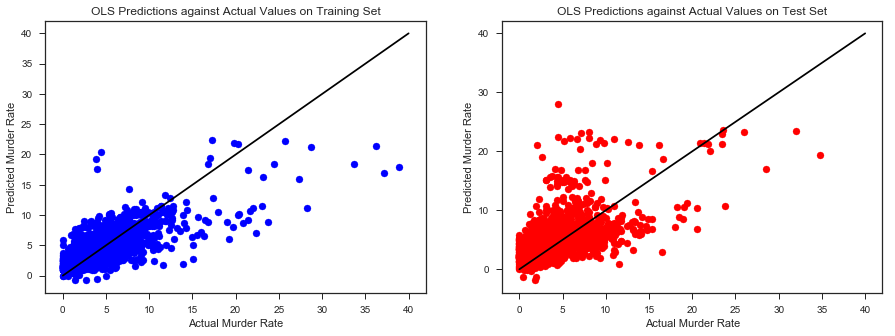

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Ridge with polynomials and interactions

In [55]:
##Ridge regression
#xtrain = xtrain.drop('Murder_Rate', axis = 1)

ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(X_train_with_cross, ytrain)
ridge_rsq_train = ridge_model.score(X_train_with_cross, ytrain)
ridge_rsq_test = ridge_model.score(X_test_with_cross, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(X_test_with_cross)
trainpreds =ridge_model.predict(X_train_with_cross)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(X_train_with_cross))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(X_test_with_cross))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)

Ridge Train R-Squared:  0.489001116398
Ridge Test R-Squared:  0.378786580899
Ridge Train MSE:  Murder_Rate    8.288301
dtype: float64
Ridge Test MSE:  Murder_Rate    8.178074
dtype: float64


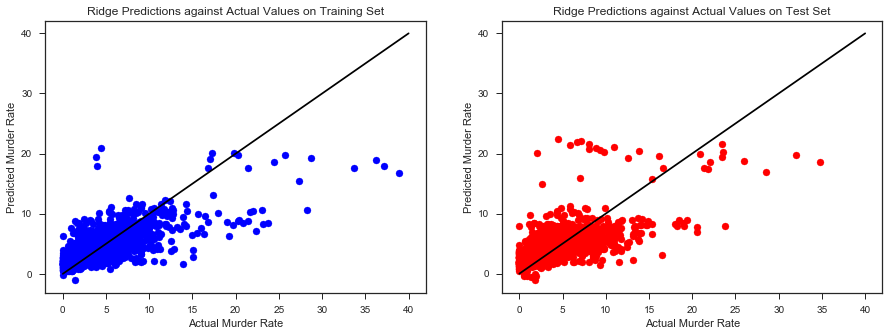

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Lasso with Polynomials and Interactions

In [57]:
## Lasso Regression
#xtrain = xtrain.drop('Murder_Rate', axis = 1)

from sklearn.linear_model import LassoCV
#
lasso_model = LassoCV(fit_intercept = True, cv=4, max_iter=10000)
lasso_fit = lasso_model.fit(X_train_with_cross, ytrain)
lasso_rsq_train = lasso_model.score(X_train_with_cross, ytrain)
lasso_rsq_test = lasso_model.score(X_test_with_cross, ytest)
print("Lasso Train R-Squared: ",  lasso_rsq_train)
print("Lasso Test R-Squared: ",  lasso_rsq_test)
testpreds = lasso_model.predict(X_test_with_cross)
trainpreds = lasso_model.predict(X_train_with_cross)
lasso_mse_train = np.mean((ytrain.values - testpreds)**2)
lasso_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Lasso Train MSE: ",  lasso_mse_train)
print("Lasso Test MSE: ",  lasso_mse_test)

lasso_coefs = pd.DataFrame({
   "Coef" : lasso_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

# note that the parameter for median age has shrunk to zero
lasso_coefs.sort_values('Coef', ascending=False)

Lasso Train R-Squared:  0.500127580624
Lasso Test R-Squared:  0.334221689857
Lasso Train MSE:  24.7567866233
Lasso Test MSE:  20.8863829099


,Coef,Predictors
1,32.689693,total_pop
40,25.056801,black_pct white_pct
34,23.569728,median_age_m latino_pct
13,20.317678,total_pop median_age_f
24,19.985727,median_income^2
27,16.182155,median_income black_pct
32,15.399091,median_age_m black_pct
39,10.229697,black_pct^2
28,9.217992,median_income white_pct
38,8.566368,median_age_f latino_pct


## Elastic regression with polynomials

In [58]:
## Elastic Regression

from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(X_train_with_cross, ytrain)
Elastic_rsq_train = Elastic_model.score(X_train_with_cross, ytrain)
Elastic_rsq_test = Elastic_model.score(X_test_with_cross, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(X_test_with_cross)
trainpreds = Elastic_model.predict(X_train_with_cross)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "Coef" : Elastic_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

# note that the parameter for median age has shrunk to zero
Elastic_coefs.sort_values('Coef', ascending=False)

Elastic Train R-Squared:  0.462750076014
Elastic Test R-Squared:  0.413910417591
Elastic Train MSE:  22.6385147467
Elastic Test MSE:  19.9566674851


,Coef,Predictors
38,9.537161,median_age_f latino_pct
34,8.838100,median_age_m latino_pct
40,8.271540,black_pct white_pct
4,6.182235,median_age_m
15,6.156121,total_pop white_pct
5,5.866970,median_age_f
1,4.633778,total_pop
32,4.356553,median_age_m black_pct
36,3.527723,median_age_f black_pct
24,3.438540,median_income^2


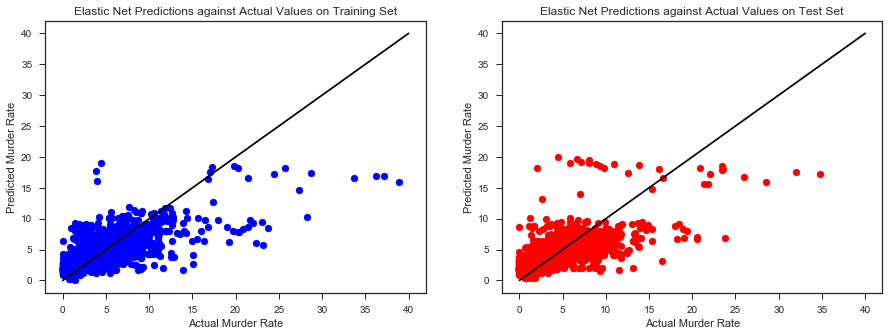

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Elastic Net Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Elastic Net Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

In [60]:
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')

train = X_train_with_cross.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    Elastic_model = ElasticNetCV(fit_intercept = True)
    Elastic_fit = Elastic_model.fit(xsamp, ysamp)


    ##results
    boots.append(Elastic_fit.coef_)
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(X_train_with_cross.columns, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : X_train_with_cross.columns,
   "SE" : boot_se,
    
})



Elastic_coefs = Elastic_coefs.merge(se_df, how='outer', on='Predictors')
Elastic_coefs

,Coef,Predictors,SE
0,0.000000,1,0.000000
1,4.633778,total_pop,1.407760
2,1.632317,pct_married,1.621920
3,-7.419146,median_income,2.247903
4,6.182235,median_age_m,1.913114
5,5.866970,median_age_f,1.325021
6,-1.887246,black_pct,1.102587
7,-2.423340,white_pct,1.205805
8,0.000000,latino_pct,0.878001
9,-7.769446,total_pop^2,2.001783


# Rerun Models with interactions but without polynomials

In [62]:
#what about only interactions?
from sklearn.preprocessing import PolynomialFeatures
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True).fit(xtrain)
X_train_with_cross = pd.DataFrame(gen_cross_terms.transform(xtrain),
                                  columns=gen_cross_terms.get_feature_names(xtrain.columns))
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True).fit(xtest)
X_test_with_cross = pd.DataFrame(gen_cross_terms.transform(xtest),
                                 columns=gen_cross_terms.get_feature_names(xtest.columns))

## OLS with interactions

In [63]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(X_train_with_cross, ytrain)
ols_rsq_train = ols_model.score(X_train_with_cross, ytrain)
ols_rsq_test = ols_model.score(X_test_with_cross, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(X_test_with_cross)
trainpreds =ols_model.predict(X_train_with_cross)
ols_mse_train = np.mean((ytrain - ols_model.predict(X_train_with_cross))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(X_test_with_cross))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)

OLS Train R-Squared:  0.490875896004
OLS Test R-Squared:  0.287528569369
OLS Train MSE:  Murder_Rate    8.257893
dtype: float64
OLS Test MSE:  Murder_Rate    9.379457
dtype: float64


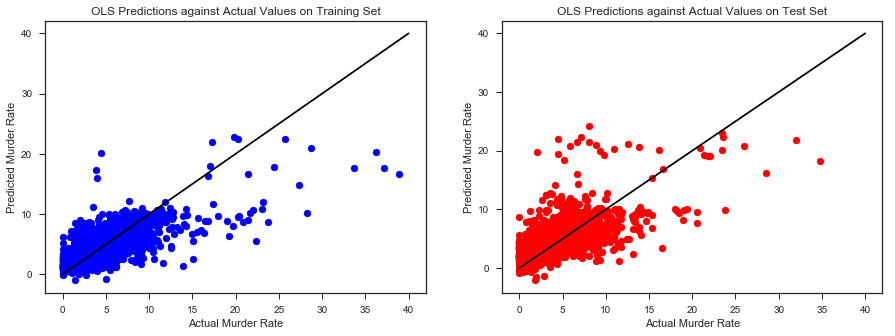

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

# Ridge with interactions

In [65]:
##Ridge regression

ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(X_train_with_cross, ytrain)
ridge_rsq_train = ridge_model.score(X_train_with_cross, ytrain)
ridge_rsq_test = ridge_model.score(X_test_with_cross, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(X_test_with_cross)
trainpreds =ridge_model.predict(X_train_with_cross)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(X_train_with_cross))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(X_test_with_cross))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)

Ridge Train R-Squared:  0.470636792328
Ridge Test R-Squared:  0.383181195828
Ridge Train MSE:  Murder_Rate    8.586167
dtype: float64
Ridge Test MSE:  Murder_Rate    8.120221
dtype: float64


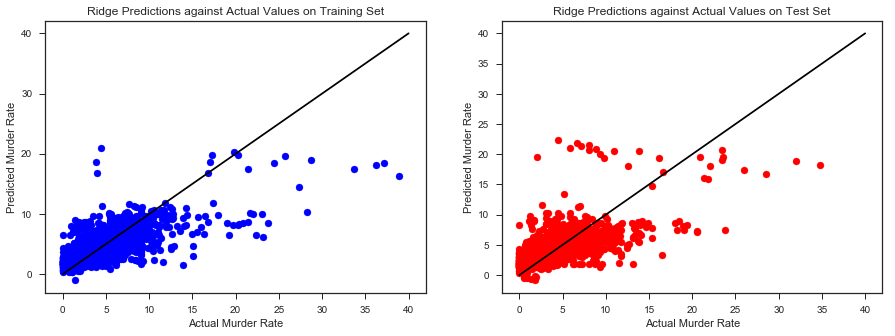

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Lasso with interactions

In [67]:
## Lasso Regression

from sklearn.linear_model import LassoCV
#
lasso_model = LassoCV(fit_intercept = True, cv=4)
lasso_fit = lasso_model.fit(X_train_with_cross, ytrain)
lasso_rsq_train = lasso_model.score(X_train_with_cross, ytrain)
lasso_rsq_test = lasso_model.score(X_test_with_cross, ytest)
print("Lasso Train R-Squared: ",  lasso_rsq_train)
print("Lasso Test R-Squared: ",  lasso_rsq_test)
testpreds = lasso_model.predict(X_test_with_cross)
trainpreds = lasso_model.predict(X_train_with_cross)
lasso_mse_train = np.mean((ytrain.values - testpreds)**2)
lasso_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Lasso Train MSE: ",  lasso_mse_train)
print("Lasso Test MSE: ",  lasso_mse_test)

lasso_coefs = pd.DataFrame({
   "_Lasso" : lasso_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

# note that the parameter for median age has shrunk to zero
lasso_coefs.sort_values('_Lasso', ascending=False)

Lasso Train R-Squared:  0.468737065102
Lasso Test R-Squared:  0.385149980828
Lasso Train MSE:  23.5541271053
Lasso Test MSE:  20.4242463973


,Predictors,_Lasso
30,median_age_m latino_pct,32.161997
14,total_pop white_pct,18.866286
28,median_age_m black_pct,12.729765
5,median_age_f,9.717726
34,black_pct white_pct,9.134695
33,median_age_f latino_pct,4.118438
9,total_pop pct_married,4.112867
24,median_income black_pct,3.596302
1,total_pop,2.840578
19,pct_married black_pct,2.069116


In [ ]:
## Elastic Regression
xtrain = xtrain.drop('Murder_Rate', axis = 1)

from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(X_train_with_cross, ytrain)
Elastic_rsq_train = Elastic_model.score(X_train_with_cross, ytrain)
Elastic_rsq_test = Elastic_model.score(X_test_with_cross, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(X_test_with_cross)
trainpreds = Elastic_model.predict(X_train_with_cross)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "_Elastic" : Elastic_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

# note that the parameter for median age has shrunk to zero
#Elastic_coefs.sort_values('_Elastic', ascending=False)

## Elastic Regression with interactions

In [ ]:
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')

train = X_train_with_cross.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    Elastic_model = ElasticNetCV(fit_intercept = True)
    Elastic_fit = Elastic_model.fit(xsamp, ysamp)


    ##results
    boots.append(Elastic_fit.coef_)
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(X_train_with_cross.columns, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : X_train_with_cross.columns,
   "SE" : boot_se,
    
})



Elastic_coefs = Elastic_coefs.merge(se_df, how='outer', on='Predictors')
Elastic_coefs['t'] = np.abs(np.divide(Elastic_coefs['Coef'].values, Elastic_coefs['SE'].values))
df = X_train_with_cross.shape[0] - X_train_with_cross.shape[1]
Elastic_coefs['p-value'] = Elastic_coefs['t'].map(lambda x: pvalue(x, df)) 
Elastic_coefs.sort_values('Coef', ascending=False)


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Elastic Net Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Elastic Net Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

# Second round of Models
Next, we run a second round of models where we added in predictors for percent of the MSA population receiving public assistance, as well as dummies for year and state. 

In [ ]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns
from scipy import stats


import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
sns.set(style="ticks")
%matplotlib inline



#sets up pandas table display
%matplotlib inline

In [70]:
data = pd.DataFrame(pd.read_csv('merged_df2.csv', encoding='latin-1'))
data.head()



,MSA,Murder_Rate,Year,MSA_Match,Unnamed: 0,msa,total_pop,white,black,latino,subsidy_pct,pct_married,median_income,median_age,median_age_m,median_age_f,state
0,"Abilene, TX1",3.7,2006,"Abilene, TX",0.0,"Abilene, TX Metro Area",158548.0,111584.0,10561.0,30992.0,0.097093,50.9,39784.0,34.4,32.5,36.5,TX
1,"Albany, GA",6.5,2006,"Albany, GA",3.0,"Albany, GA Metro Area",165062.0,NaN,NaN,NaN,0.160437,46.1,35515.0,34.3,31.2,36.3,GA
2,"Albany-Schenectady-Troy, NY",2.1,2006,"Albany-Schenectady-Troy, NY",4.0,"Albany-Schenectady-Troy, NY Metro Area",850957.0,725185.0,56644.0,25787.0,0.070040,48.1,53202.0,38.2,36.7,39.6,NY
3,"Albuquerque, NM",8.9,2006,"Albuquerque, NM",5.0,"Albuquerque, NM Metro Area",815430.0,364701.0,20353.0,358573.0,0.082469,47.2,44799.0,35.7,34.6,36.9,NM
4,"Alexandria, LA",7.1,2006,"Alexandria, LA",6.0,"Alexandria, LA Metro Area",150827.0,NaN,NaN,NaN,0.125644,46.3,34966.0,36.1,34.0,38.2,LA


### Make dummies for state and year

In [71]:
#training DUMMIES
state_dummy = pd.get_dummies(data['state'], prefix = 'state') 

year_dummy = pd.get_dummies(data['Year'], prefix = 'YR') 
dummy = pd.concat([state_dummy, year_dummy], axis = 1)
data = pd.concat([data, dummy], axis = 1)
data= data.drop(['state_VT'], axis = 1)

In [72]:
#recode some of the variables

data['black_pct'] = np.divide(data['black'].values, data['total_pop'].values)
data['white_pct'] = np.divide(data['white'].values, data['total_pop'].values)
data['latino_pct'] = np.divide(data['latino'].values, data['total_pop'].values)

#discard MSA's with total population measurement error (n-4)
data.loc[(data['total_pop'] <= 1000) & (data['total_pop'] > 0)][['total_pop']] 
data = data[data.total_pop >= data.black]
np.amax(data[['black_pct']].values[np.isfinite(data[['black_pct']].values)])
data=data.replace('N',np.NaN)


## Make training and test data

In [74]:
####make training and test
np.random.seed(2138)
msk = np.random.rand(len(data)) < 0.5
data_train = data[msk]
data_test = data[~msk]
print(data_train.shape)
print(data_train.shape)

(1524, 82)
(1524, 82)


## Prep data for analysis

In [75]:
#add in subsidy_pct and year and state dummies

predictors = ['total_pop', 'pct_married', 'subsidy_pct',
       'median_income', 'median_age_m', 'median_age_f',
       'black_pct', 'white_pct', 'latino_pct', 'state_AK', 'state_AL', 'state_AR', 
        'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_WA',
       'state_WI', 'state_WV', 'state_WY',  'YR_2006', 'YR_2007', 'YR_2008',
       'YR_2009', 'YR_2010', 'YR_2011', 'YR_2012', 'YR_2013', 'YR_2014',
       'YR_2016' ]
xtrain = data_train[predictors].copy(deep=True)
ytrain = data_train[['Murder_Rate']].copy(deep=True)


xtest = data_test[predictors]
ytest = data_test[['Murder_Rate']]
type(xtrain)
type(xtest)

pandas.core.frame.DataFrame

### Impute missing data

In [76]:
#imputer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(xtrain)

# Impute our data, then train
xtrain = imp.transform(xtrain)

imp = imp.fit(xtest)

# Impute our data, then train
xtest = imp.transform(xtest)

xtrain = pd.DataFrame(xtrain)
xtrain.columns = predictors
xtest = pd.DataFrame(xtest)
xtest.columns = predictors






### Standardize predictors

In [78]:
#Next, we standardize all predictors so we can assess their relative changes 
#independent of their scales
def standardize(vector):
    vector = np.array(vector)
    x_mean = np.mean(vector)
    x_max = np.amax(vector)
    x_min = np.amin(vector)
    return(np.array((vector-x_min)/(x_max-x_min)))

xtrain = xtrain.apply(standardize, axis = 0)
xtest = xtest.apply(standardize, axis = 0)


## OLS 

In [100]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(xtrain, ytrain)
ols_rsq_train = ols_model.score(xtrain, ytrain)
ols_rsq_test = ols_model.score(xtest, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(xtest)
trainpreds =ols_model.predict(xtrain)
ols_mse_train = np.mean((ytrain - ols_model.predict(xtrain))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(xtest))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)

##results
ols_coefs = pd.DataFrame({
    "Predictors" : predictors,
   "Coef" : ols_fit.coef_[0],
    
})
#ols_coefs.sort_values('Coef', ascending=False)


OLS Train R-Squared:  0.565689360363
OLS Test R-Squared:  0.379935524734
OLS Train MSE:  Murder_Rate    7.044433
dtype: float64
OLS Test MSE:  Murder_Rate    8.162949
dtype: float64


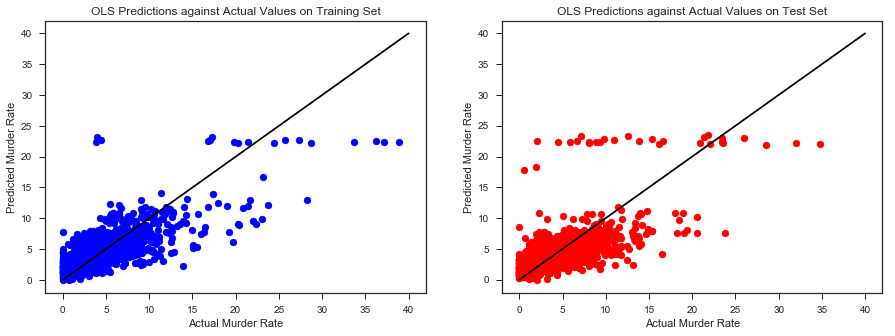

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

In [102]:
#boot strap to get standard errors:
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    ols_model = LinearRegression(fit_intercept = True)
    ols_fit = ols_model.fit(xsamp, ysamp)


    ##results
    boots.append(ols_fit.coef_[0])
    i = i+1


In [103]:
def pvalue(t, df):
    return((1 - stats.t.cdf(t,df=df))*2)

pvalue(1.96, 1000)
    

0.050273184955748729

In [104]:
bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



ols_coefs = ols_coefs.merge(se_df, how='outer', on='Predictors')
ols_coefs['t'] = np.abs(np.divide(ols_coefs['Coef'].values, ols_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
ols_coefs['p-value'] = ols_coefs['t'].map(lambda x: pvalue(x, df)) 
ols_coefs

,Coef,Predictors,SE,t,p-value
0,2.868890e+00,total_pop,9.261577e-01,3.097626e+00,1.988087e-03
1,1.463768e-01,pct_married,1.015025e+00,1.442101e-01,8.853546e-01
2,1.901666e+00,subsidy_pct,2.064904e+00,9.209466e-01,3.572310e-01
3,-2.685076e+00,median_income,1.062771e+00,2.526487e+00,1.162628e-02
4,1.435364e+00,median_age_m,4.843416e+00,2.963538e-01,7.670022e-01
5,2.963508e+00,median_age_f,4.438870e+00,6.676268e-01,5.044777e-01
6,6.752072e+00,black_pct,9.037819e-01,7.470909e+00,1.367795e-13
7,-6.441579e+00,white_pct,1.428708e+00,4.508675e+00,7.046661e-06
8,-2.832037e+00,latino_pct,1.517937e+00,1.865715e+00,6.228234e-02
9,-1.328953e+01,state_AK,3.585773e+00,3.706184e+00,2.182942e-04


## Ridge regression 

In [108]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(xtrain, ytrain)
ridge_rsq_train = ridge_model.score(xtrain, ytrain)
ridge_rsq_test = ridge_model.score(xtest, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(xtest)
trainpreds =ridge_model.predict(xtrain)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(xtrain))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(xtest))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)
##results
ridge_coefs = pd.DataFrame({
    "Predictors" : predictors,
   "Coef" : ridge_fit.coef_[0],
    
})
#ridge_coefs.sort_values('Coef', ascending=False)



Ridge Train R-Squared:  0.55414810488
Ridge Test R-Squared:  0.426980582764
Ridge Train MSE:  Murder_Rate    7.23163
dtype: float64
Ridge Test MSE:  Murder_Rate    7.543616
dtype: float64


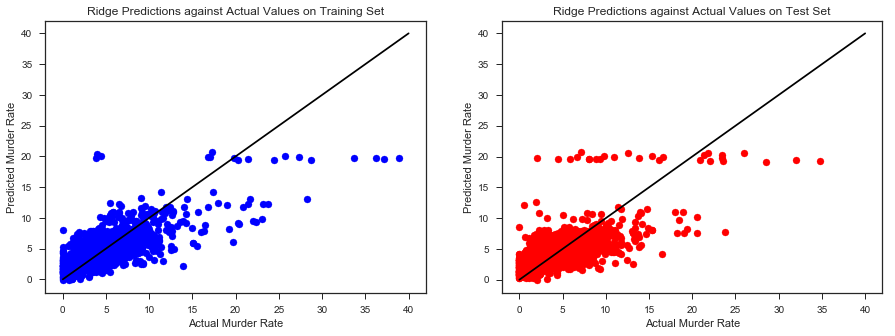

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

In [110]:
#boot strap to get standard errors:
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    ridge_model = RidgeCV(fit_intercept = True)
    ridge_fit = ridge_model.fit(xsamp, ysamp)


    ##results
    boots.append(ridge_fit.coef_[0])
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



ridge_coefs = ridge_coefs.merge(se_df, how='outer', on='Predictors')
ridge_coefs['t'] = np.abs(np.divide(ridge_coefs['Coef'].values, ridge_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
ridge_coefs['p-value'] = ridge_coefs['t'].map(lambda x: pvalue(x, df)) 
ridge_coefs.sort_values('Coef', ascending=False)
ridge_coefs


,Coef,Predictors,SE,t,p-value
0,3.192453,total_pop,1.201500,2.657057,7.968857e-03
1,0.008535,pct_married,0.873482,0.009771,9.922053e-01
2,2.947143,subsidy_pct,1.815757,1.623094,1.047860e-01
3,-3.871990,median_income,0.885684,4.371752,1.320087e-05
4,0.457448,median_age_m,3.224513,0.141866,8.872058e-01
5,4.798336,median_age_f,2.812594,1.706018,8.821816e-02
6,7.104699,black_pct,0.762466,9.318052,0.000000e+00
7,-6.066147,white_pct,1.432088,4.235874,2.419538e-05
8,-0.168152,latino_pct,1.512093,0.111205,9.114691e-01
9,-7.040969,state_AK,2.649594,2.657377,7.961340e-03


# Rerun models with polynomials and interactions

In [90]:
# Does adding polynomial terms or interactions boost fit?
from sklearn.preprocessing import PolynomialFeatures
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=False).fit(xtrain)
X_train_with_cross = pd.DataFrame(gen_cross_terms.transform(xtrain),
                                  columns=gen_cross_terms.get_feature_names(xtrain.columns))
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=False).fit(xtest)
X_test_with_cross = pd.DataFrame(gen_cross_terms.transform(xtest),
                                 columns=gen_cross_terms.get_feature_names(xtest.columns))

## OLS with polynomials and interactions

In [111]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(X_train_with_cross, ytrain)
ols_rsq_train = ols_model.score(X_train_with_cross, ytrain)
ols_rsq_test = ols_model.score(X_test_with_cross, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(X_test_with_cross)
trainpreds =ols_model.predict(X_train_with_cross)
ols_mse_train = np.mean((ytrain - ols_model.predict(X_train_with_cross))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(X_test_with_cross))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)



OLS Train R-Squared:  0.895321623058
OLS Test R-Squared:  -7.30542139213e+21
OLS Train MSE:  Murder_Rate    1.697863
dtype: float64
OLS Test MSE:  Murder_Rate    9.617352e+22
dtype: float64


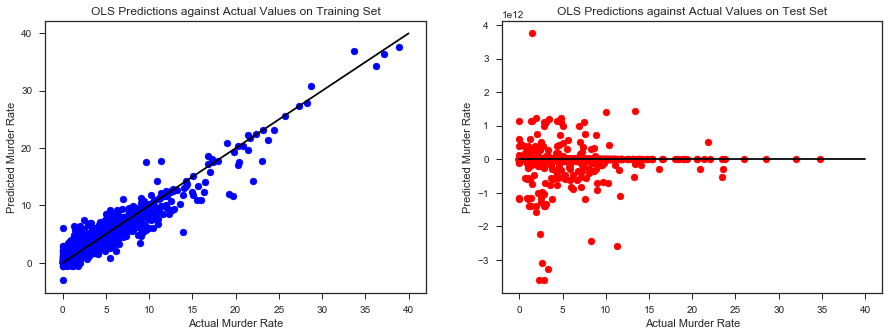

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Ridge Regression with polynomials and interactions

In [113]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(X_train_with_cross, ytrain)
ridge_rsq_train = ridge_model.score(X_train_with_cross, ytrain)
ridge_rsq_test = ridge_model.score(X_test_with_cross, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(X_test_with_cross)
trainpreds =ridge_model.predict(X_train_with_cross)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(X_train_with_cross))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(X_test_with_cross))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)

Ridge Train R-Squared:  0.700665968344
Ridge Test R-Squared:  0.406117573616
Ridge Train MSE:  Murder_Rate    4.855139
dtype: float64
Ridge Test MSE:  Murder_Rate    7.818271
dtype: float64


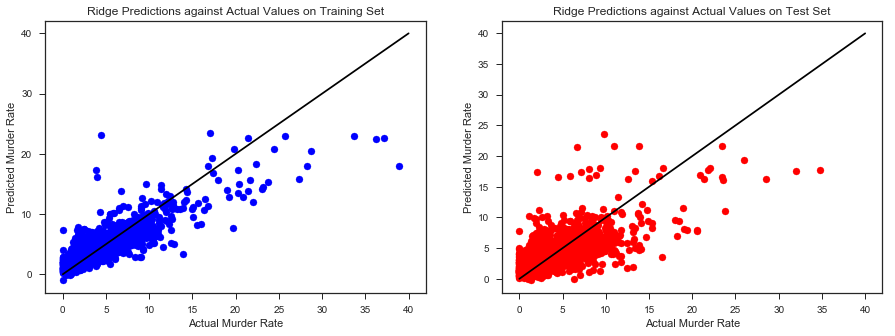

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Elastic regression with polynomials and interactions

In [115]:
## Elastic Regression
from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(X_train_with_cross, ytrain)
Elastic_rsq_train = Elastic_model.score(X_train_with_cross, ytrain)
Elastic_rsq_test = Elastic_model.score(X_test_with_cross, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(X_test_with_cross)
trainpreds = Elastic_model.predict(X_train_with_cross)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "Coef" : Elastic_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

#Elastic_coefs.sort_values('Coef', ascending=False)

Elastic Train R-Squared:  0.637158210149
Elastic Test R-Squared:  0.43376528923
Elastic Train MSE:  22.8676596691
Elastic Test MSE:  21.4589183113


In [ ]:
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')

train = X_train_with_cross.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    Elastic_model = ElasticNetCV(fit_intercept = True)
    Elastic_fit = Elastic_model.fit(xsamp, ysamp)


    ##results
    boots.append(Elastic_fit.coef_)
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(X_train_with_cross.columns, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : X_train_with_cross.columns,
   "SE" : boot_se,
    
})



Elastic_coefs = Elastic_coefs.merge(se_df, how='outer', on='Predictors')
Elastic_coefs['t'] = np.abs(np.divide(Elastic_coefs['Coef'].values, Elastic_coefs['SE'].values))
df = X_train_with_cross.shape[0] - X_train_with_cross.shape[1]
Elastic_coefs['p-value'] = Elastic_coefs['t'].map(lambda x: pvalue(x, df)) 
Elastic_coefs.sort_values('Coef', ascending=False)
#Elastic_coefs

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

# Rerun models with interactions but not polynomials

In [129]:
#what about only interactions?
from sklearn.preprocessing import PolynomialFeatures
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True).fit(xtrain)
X_train_with_cross = pd.DataFrame(gen_cross_terms.transform(xtrain),
                                  columns=gen_cross_terms.get_feature_names(xtrain.columns))
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True).fit(xtest)
X_test_with_cross = pd.DataFrame(gen_cross_terms.transform(xtest),
                                 columns=gen_cross_terms.get_feature_names(xtest.columns))

## OLS with interactions

In [130]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(X_train_with_cross, ytrain)
ols_rsq_train = ols_model.score(X_train_with_cross, ytrain)
ols_rsq_test = ols_model.score(X_test_with_cross, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(X_test_with_cross)
trainpreds =ols_model.predict(X_train_with_cross)
ols_mse_train = np.mean((ytrain - ols_model.predict(X_train_with_cross))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(X_test_with_cross))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)

OLS Train R-Squared:  0.895321623058
OLS Test R-Squared:  -7.30542139213e+21
OLS Train MSE:  Murder_Rate    1.697863
dtype: float64
OLS Test MSE:  Murder_Rate    9.617352e+22
dtype: float64


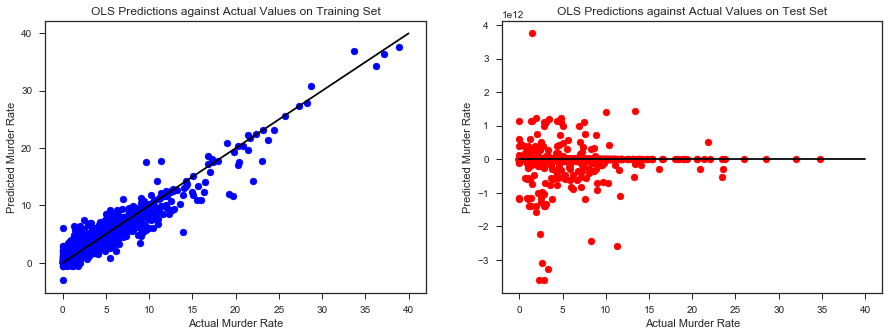

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Ridge with interactions

In [132]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(X_train_with_cross, ytrain)
ridge_rsq_train = ridge_model.score(X_train_with_cross, ytrain)
ridge_rsq_test = ridge_model.score(X_test_with_cross, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(X_test_with_cross)
trainpreds =ridge_model.predict(X_train_with_cross)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(X_train_with_cross))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(X_test_with_cross))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)

Ridge Train R-Squared:  0.700665968344
Ridge Test R-Squared:  0.406117573616
Ridge Train MSE:  Murder_Rate    4.855139
dtype: float64
Ridge Test MSE:  Murder_Rate    7.818271
dtype: float64


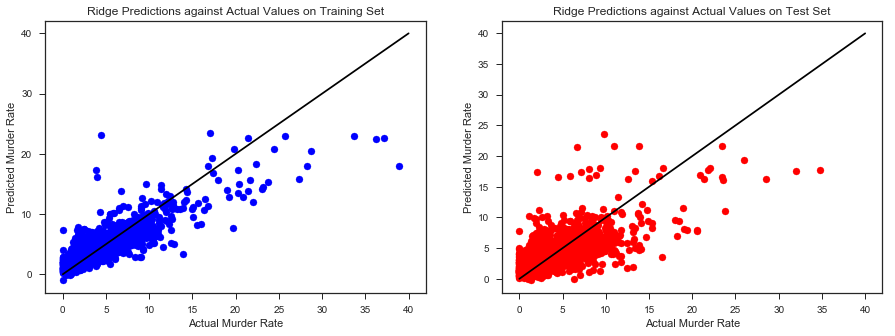

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Lasso with interactions

In [ ]:
## Lasso Regression
from sklearn.linear_model import LassoCV
#
lasso_model = LassoCV(fit_intercept = True, cv=4, max_iter=10000)
lasso_fit = lasso_model.fit(X_train_with_cross, ytrain)
lasso_rsq_train = lasso_model.score(X_train_with_cross, ytrain)
lasso_rsq_test = lasso_model.score(X_test_with_cross, ytest)
print("Lasso Train R-Squared: ",  lasso_rsq_train)
print("Lasso Test R-Squared: ",  lasso_rsq_test)
testpreds = lasso_model.predict(X_test_with_cross)
trainpreds = lasso_model.predict(X_train_with_cross)
lasso_mse_train = np.mean((ytrain.values - testpreds)**2)
lasso_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Lasso Train MSE: ",  lasso_mse_train)
print("Lasso Test MSE: ",  lasso_mse_test)

lasso_coefs = pd.DataFrame({
   "_Lasso" : lasso_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

# note that the parameter for median age has shrunk to zero
#lasso_coefs.sort_values('_Lasso', ascending=False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Lasso Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Lasso Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Elastic Regression with interactions

In [135]:
## Elastic Regression
from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(X_train_with_cross, ytrain)
Elastic_rsq_train = Elastic_model.score(X_train_with_cross, ytrain)
Elastic_rsq_test = Elastic_model.score(X_test_with_cross, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(X_test_with_cross)
trainpreds = Elastic_model.predict(X_train_with_cross)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "_Elastic" : Elastic_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

#Elastic_coefs.sort_values('_Elastic', ascending=False)

Elastic Train R-Squared:  0.637158210149
Elastic Test R-Squared:  0.43376528923
Elastic Train MSE:  22.8676596691
Elastic Test MSE:  21.4589183113


In [ ]:
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')

train = X_train_with_cross.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    Elastic_model = ElasticNetCV(fit_intercept = True)
    Elastic_fit = Elastic_model.fit(xsamp, ysamp)


    ##results
    boots.append(Elastic_fit.coef_)
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(X_train_with_cross.columns, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : X_train_with_cross.columns,
   "SE" : boot_se,
    
})



Elastic_coefs = Elastic_coefs.merge(se_df, how='outer', on='Predictors')
Elastic_coefs['t'] = np.abs(np.divide(Elastic_coefs['Coef'].values, Elastic_coefs['SE'].values))
df = X_train_with_cross.shape[0] - X_train_with_cross.shape[1]
Elastic_coefs['p-value'] = Elastic_coefs['t'].map(lambda x: pvalue(x, df)) 
Elastic_coefs.sort_values('Coef', ascending=False)
Elastic_coefs

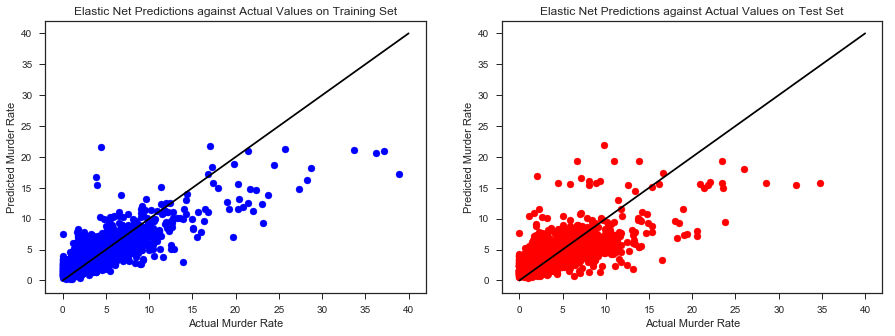

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Elastic Net Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Elastic Net Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

# Third and Final Round of Models
This round of models forms the meat of our analysis. We add in outside data on presidential democratic vote share, and police presence. We then rerun all the models as in the previous two rounds, but with these added predictors.

In [155]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns
from scipy import stats


import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
sns.set(style="ticks")
%matplotlib inline



#sets up pandas table display
%matplotlib inline

In [156]:
data = pd.DataFrame(pd.read_csv('final_df_merge.csv', encoding='latin-1'))
data.head()
d2 = pd.DataFrame(pd.read_csv('merged_df2.csv', encoding ='latin-1'))
d2.head()
data[['state']] = d2[['state']]
data.head()

,MSA_x,Murder_Rate,Year,MSA_Match,msa,total_pop,white,black,latino,subsidy_pct,...,MSAF,LodgeCount,MSAd,MSA_y,dem_vote_share2008,dem_vote_share2012,dem_vote_share2016,DEMVOTESHARE,MSA,state
0,"Abilene, TX1",3.7,2006,"Abilene, TX","Abilene, TX Metro Area",158548.0,111584.0,10561.0,30992.0,0.097093,...,no dice,0,"Abilene, TX","Abilene, TX",15281.0,11701.0,11550.0,15281.0,"Abilene, TX1",TX
1,"Albany, GA",6.5,2006,"Albany, GA","Albany, GA Metro Area",165062.0,NaN,NaN,NaN,0.160437,...,"Albany, GA",1,"Albany, GA","Albany, GA",35124.0,35216.0,31322.0,35124.0,"Albany, GA",GA
2,"Albany-Schenectady-Troy, NY",2.1,2006,"Albany-Schenectady-Troy, NY","Albany-Schenectady-Troy, NY Metro Area",850957.0,725185.0,56644.0,25787.0,0.070040,...,"Albany-Schenectady-Troy, NY",3,"Albany-Schenectady-Troy, NY","Albany-Schenectady-Troy, NY",234955.0,203119.0,186007.0,234955.0,"Albany-Schenectady-Troy, NY",NY
3,"Albuquerque, NM",8.9,2006,"Albuquerque, NM","Albuquerque, NM Metro Area",815430.0,364701.0,20353.0,358573.0,0.082469,...,"Albuquerque, NM",3,"Albuquerque, NM","Albuquerque, NM",222678.0,189901.0,181945.0,222678.0,"Albuquerque, NM",NM
4,"Alexandria, LA",7.1,2006,"Alexandria, LA","Alexandria, LA Metro Area",150827.0,NaN,NaN,NaN,0.125644,...,"Alexandria, LA",2,"Alexandria, LA","Alexandria, LA",21601.0,21461.0,19499.0,21601.0,"Alexandria, LA",LA


## Construct dummies and prep data for analysis

In [157]:
#training DUMMIES
state_dummy = pd.get_dummies(data['state'], prefix = 'state') 

year_dummy = pd.get_dummies(data['Year'], prefix = 'YR') 
dummy = pd.concat([state_dummy, year_dummy], axis = 1)
data = pd.concat([data, dummy], axis = 1)
data= data.drop(['state_VT'], axis = 1)

In [158]:
#recode some of the variables

data['black_pct'] = np.divide(data['black'].values, data['total_pop'].values)
data['white_pct'] = np.divide(data['white'].values, data['total_pop'].values)
data['latino_pct'] = np.divide(data['latino'].values, data['total_pop'].values)
data['fop_density'] = np.divide(data['LodgeCount'].values, data['total_pop'].values)


#discard MSA's with total population measurement error (n-4)
data.loc[(data['total_pop'] <= 1000) & (data['total_pop'] > 0)][['total_pop']] 
data = data[data.total_pop >= data.black]
np.amax(data[['black_pct']].values[np.isfinite(data[['black_pct']].values)])
data=data.replace('N',np.NaN)


## Construct training and test data

In [159]:
####make training and test
np.random.seed(2138)
msk = np.random.rand(len(data)) < 0.5
data_train = data[msk]
data_test = data[~msk]
print(data_train.shape)
print(data_train.shape)

(1524, 91)
(1524, 91)


In [160]:
#make xtrain and ytrain, we drop the MSA name and Years 
#from the baseline model because we do not want this baseline to hve
#fixed effects. We also separate overall median age into male/female

predictors = ['total_pop', 'pct_married', 'subsidy_pct',
       'median_income', 'median_age_m', 'median_age_f',
       'black_pct', 'white_pct', 'latino_pct', 'state_AK', 'state_AL', 'state_AR', 
        'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_WA',
       'state_WI', 'state_WV', 'state_WY',  'YR_2006', 'YR_2007', 'YR_2008',
       'YR_2009', 'YR_2010', 'YR_2011', 'YR_2012', 'YR_2013', 'YR_2014',
       'YR_2016', 'fop_density', 'DEMVOTESHARE']
xtrain = data_train[predictors].copy(deep=True)
ytrain = data_train[['Murder_Rate']].copy(deep=True)


xtest = data_test[predictors].copy(deep=True)
ytest = data_test[['Murder_Rate']].copy(deep=True)
type(xtrain)
type(xtest)

pandas.core.frame.DataFrame

### Impute Missing Data

In [161]:
#imputer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(xtrain)

# Impute our data, then train
xtrain = imp.transform(xtrain)

imp = imp.fit(xtest)

# Impute our data, then train
xtest = imp.transform(xtest)

xtrain = pd.DataFrame(xtrain)
xtrain.columns = predictors
xtest = pd.DataFrame(xtest)
xtest.columns = predictors






## Standardize predictors

In [162]:
#Next, we standardize all predictors so we can assess their relative changes 
#independent of their scales
def standardize(vector):
    vector = np.array(vector)
    x_mean = np.mean(vector)
    x_max = np.amax(vector)
    x_min = np.amin(vector)
    return(np.array((vector-x_min)/(x_max-x_min)))

xtrain = xtrain.apply(standardize, axis = 0)
xtest = xtest.apply(standardize, axis = 0)


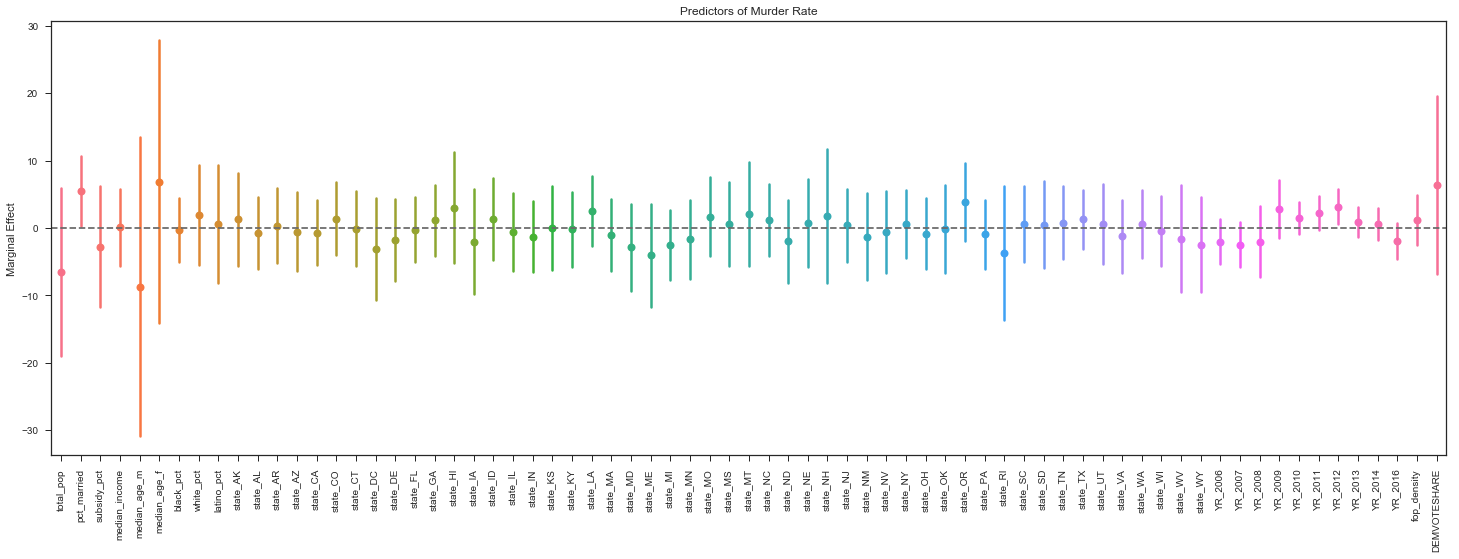

In [164]:
bigstring = ""
for x in predictors:
    bigstring = bigstring+x+"+"
bigstring = bigstring[0:-1]

xtrain2 = xtrain.copy(deep=True)
xtrain2["Murder_Rate"] = ytrain

a = sns.coefplot("Murder_Rate ~ "+bigstring, data=xtrain2)
ax = plt.gca()
ax.set_title('Predictors of Murder Rate')
ax.set_ylabel('Marginal Effect')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.rcParams["figure.figsize"] = (20,16)
a

##  OLS 

In [165]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(xtrain, ytrain)
ols_rsq_train = ols_model.score(xtrain, ytrain)
ols_rsq_test = ols_model.score(xtest, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(xtest)
trainpreds =ols_model.predict(xtrain)
ols_mse_train = np.mean((ytrain - ols_model.predict(xtrain))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(xtest))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)

##results
ols_coefs = pd.DataFrame({
    "Predictors" : predictors,
   "Coef" : ols_fit.coef_[0],
    
})
#ols_coefs.sort_values('Coef', ascending=False)


OLS Train R-Squared:  0.565561110228
OLS Test R-Squared:  0.382925873922
OLS Train MSE:  Murder_Rate    7.046513
dtype: float64
OLS Test MSE:  Murder_Rate    8.123582
dtype: float64


In [166]:
#boot strap to get standard errors:
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    ols_model = LinearRegression(fit_intercept = True)
    ols_fit = ols_model.fit(xsamp, ysamp)


    ##results
    boots.append(ols_fit.coef_[0])
    i = i+1
    
def pvalue(t, df):
    return((1 - stats.t.cdf(t,df=df))*2)

pvalue(1.96, 1000)

bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



ols_coefs = ols_coefs.merge(se_df, how='outer', on='Predictors')
ols_coefs['t'] = np.abs(np.divide(ols_coefs['Coef'].values, ols_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
ols_coefs['p-value'] = ols_coefs['t'].map(lambda x: pvalue(x, df)) 
ols_coefs

,Coef,Predictors,SE,t,p-value
0,7.610258e-01,total_pop,1.067081e+00,7.131848e-01,4.758460e-01
1,-9.023362e-01,pct_married,1.515971e+00,5.952197e-01,5.517893e-01
2,1.901102e+00,subsidy_pct,2.040210e+00,9.318167e-01,3.515861e-01
3,-2.836339e+00,median_income,1.119732e+00,2.533051e+00,1.141190e-02
4,8.791256e-01,median_age_m,5.180819e+00,1.696886e-01,8.652787e-01
5,3.409203e+00,median_age_f,4.529000e+00,7.527496e-01,4.517223e-01
6,6.740294e+00,black_pct,7.719580e-01,8.731426e+00,0.000000e+00
7,-5.932736e+00,white_pct,1.554032e+00,3.817640e+00,1.403992e-04
8,-2.258449e+00,latino_pct,1.331287e+00,1.696441e+00,9.001665e-02
9,-1.251221e+01,state_AK,2.914327e+00,4.293346e+00,1.876617e-05


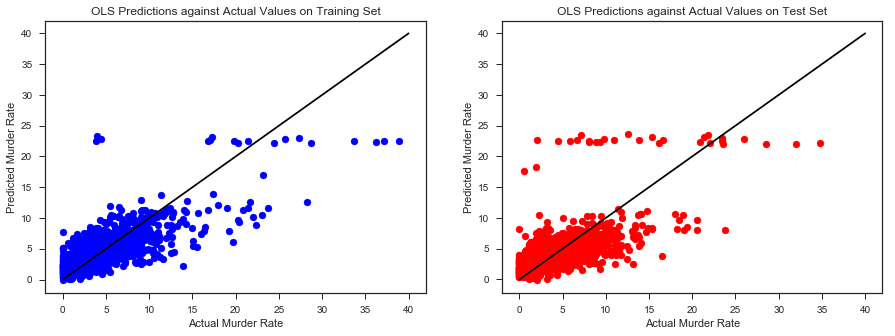

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Ridge Regression

In [169]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(xtrain, ytrain)
ridge_rsq_train = ridge_model.score(xtrain, ytrain)
ridge_rsq_test = ridge_model.score(xtest, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(xtest)
trainpreds =ridge_model.predict(xtrain)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(xtrain))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(xtest))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)
##results
ridge_coefs = pd.DataFrame({
    "Predictors" : predictors,
   "Coef" : ridge_fit.coef_[0],
    
})
#ridge_coefs.sort_values('Ridge', ascending=False)



Ridge Train R-Squared:  0.55562586184
Ridge Test R-Squared:  0.43085175878
Ridge Train MSE:  Murder_Rate    7.207661
dtype: float64
Ridge Test MSE:  Murder_Rate    7.492653
dtype: float64


In [170]:
#boot strap to get standard errors:
train = xtrain.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    ridge_model = RidgeCV(fit_intercept = True)
    ridge_fit = ridge_model.fit(xsamp, ysamp)


    ##results
    boots.append(ridge_fit.coef_[0])
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(predictors, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : predictors,
   "SE" : boot_se,
    
})



ridge_coefs = ridge_coefs.merge(se_df, how='outer', on='Predictors')
ridge_coefs['t'] = np.abs(np.divide(ridge_coefs['Coef'].values, ridge_coefs['SE'].values))
df = xtrain.shape[0] - xtrain.shape[1]
ridge_coefs['p-value'] = ridge_coefs['t'].map(lambda x: pvalue(x, df)) 
ridge_coefs.sort_values('Coef', ascending=False)
ridge_coefs

,Coef,Predictors,SE,t,p-value
0,0.991858,total_pop,1.241798,0.798727,4.245791e-01
1,-0.066632,pct_married,1.158512,0.057515,9.541429e-01
2,2.930484,subsidy_pct,2.321860,1.262128,2.071053e-01
3,-4.103606,median_income,1.257123,3.264283,1.122945e-03
4,0.451512,median_age_m,3.110463,0.145159,8.846054e-01
5,4.869449,median_age_f,2.748329,1.771785,7.663973e-02
6,7.033583,black_pct,0.808603,8.698439,0.000000e+00
7,-5.908609,white_pct,1.598254,3.696914,2.263516e-04
8,-0.168525,latino_pct,1.327505,0.126949,8.989984e-01
9,-7.059986,state_AK,2.196160,3.214696,1.334526e-03


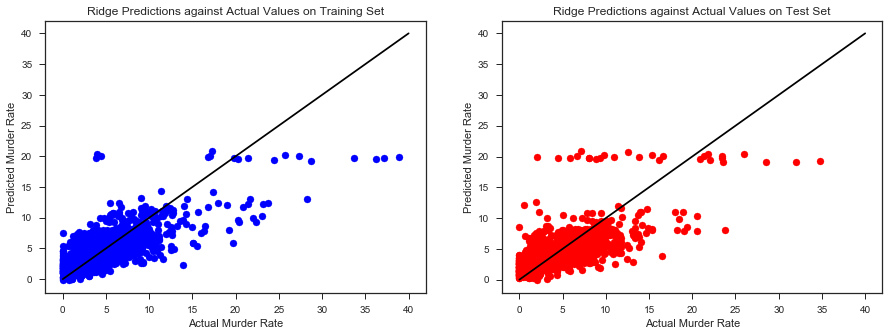

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Elastic Net Regression

In [172]:
## Elastic Regression
from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(xtrain, ytrain)
Elastic_rsq_train = Elastic_model.score(xtrain, ytrain)
Elastic_rsq_test = Elastic_model.score(xtest, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(xtest)
trainpreds = Elastic_model.predict(xtrain)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "Coef" : Elastic_model.coef_,
    "Predictors" : xtrain.columns,
    
})

Elastic Train R-Squared:  0.479371451455
Elastic Test R-Squared:  0.431804856812
Elastic Train MSE:  21.6503993719
Elastic Test MSE:  19.8727495793


# Rerun models with polynomials and interactions

In [173]:
# Does adding polynomial terms or interactions boost fit?
from sklearn.preprocessing import PolynomialFeatures
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=False).fit(xtrain)
X_train_with_cross = pd.DataFrame(gen_cross_terms.transform(xtrain),
                                  columns=gen_cross_terms.get_feature_names(xtrain.columns))
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=False).fit(xtest)
X_test_with_cross = pd.DataFrame(gen_cross_terms.transform(xtest),
                                 columns=gen_cross_terms.get_feature_names(xtest.columns))

## OLS with interactions and polynomials

In [175]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(X_train_with_cross, ytrain)
ols_rsq_train = ols_model.score(X_train_with_cross, ytrain)
ols_rsq_test = ols_model.score(X_test_with_cross, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(X_test_with_cross)
trainpreds =ols_model.predict(X_train_with_cross)
ols_mse_train = np.mean((ytrain - ols_model.predict(X_train_with_cross))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(X_test_with_cross))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)



OLS Train R-Squared:  0.922740353608
OLS Test R-Squared:  -4.10073717756e+20
OLS Train MSE:  Murder_Rate    1.253136
dtype: float64
OLS Test MSE:  Murder_Rate    5.398488e+21
dtype: float64


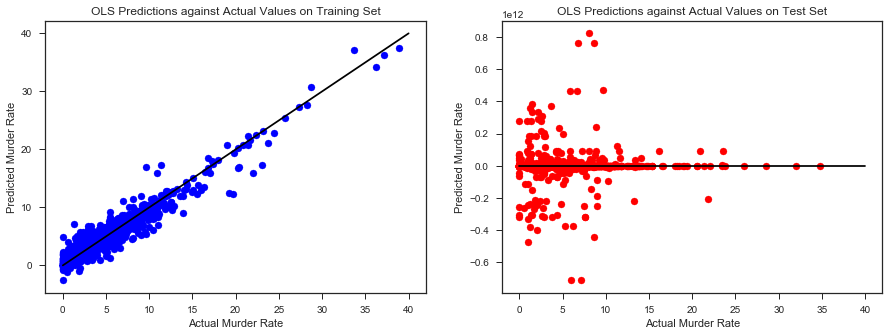

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

### Ridge Regression with interactions and polynomials

In [177]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(X_train_with_cross, ytrain)
ridge_rsq_train = ridge_model.score(X_train_with_cross, ytrain)
ridge_rsq_test = ridge_model.score(X_test_with_cross, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(X_test_with_cross)
trainpreds =ridge_model.predict(X_train_with_cross)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(X_train_with_cross))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(X_test_with_cross))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)

Ridge Train R-Squared:  0.713410068114
Ridge Test R-Squared:  0.419692152961
Ridge Train MSE:  Murder_Rate    4.648432
dtype: float64
Ridge Test MSE:  Murder_Rate    7.639566
dtype: float64


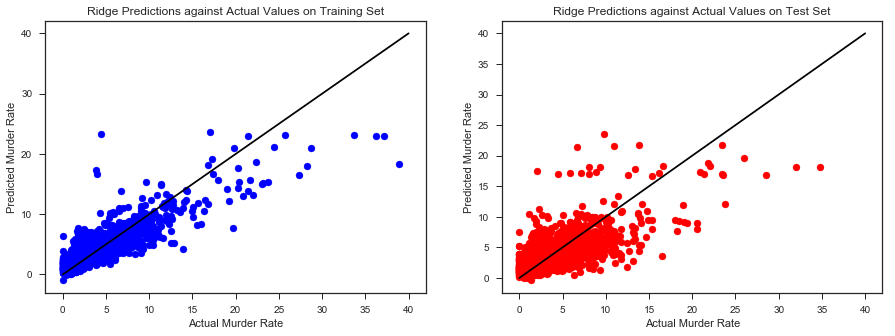

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

#### Elastic Net Regression with interactions and Polynomials

In [179]:
## Elastic Regression
from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(X_train_with_cross, ytrain)
Elastic_rsq_train = Elastic_model.score(X_train_with_cross, ytrain)
Elastic_rsq_test = Elastic_model.score(X_test_with_cross, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(X_test_with_cross)
trainpreds = Elastic_model.predict(X_train_with_cross)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "Coef" : Elastic_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

#Elastic_coefs.sort_values('Coef', ascending=False)

Elastic Train R-Squared:  0.645439792868
Elastic Test R-Squared:  0.444311807606
Elastic Train MSE:  23.131569766
Elastic Test MSE:  21.6530467689


In [ ]:
# most predictive of higher
print(Elastic_coefs.sort_values('Coef', ascending=False)[0:10].to_latex())

# most predictive of lower
print(Elastic_coefs.sort_values('Coef', ascending=True)[0:10].to_latex(index=False))

# substantive variables
varskeep = ["fop_density", "subsidy_pct", "DEMVOTESHARE", "pct_married", "median_income"]
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="fop_density"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="subsidy_pct"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="DEMVOTESHARE"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="pct_married"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="median_income"].to_latex(index=False))

In [ ]:
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')

train = X_train_with_cross.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    Elastic_model = ElasticNetCV(fit_intercept = True)
    Elastic_fit = Elastic_model.fit(xsamp, ysamp)


    ##results
    boots.append(Elastic_fit.coef_)
    i = i+1
    print(Elastic_fit.coef_)
    
bootdf=pd.DataFrame.from_items(zip(X_train_with_cross.columns, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : X_train_with_cross.columns,
   "SE" : boot_se,
    
})



Elastic_coefs = Elastic_coefs.merge(se_df, how='outer', on='Predictors')
Elastic_coefs['t'] = np.abs(np.divide(Elastic_coefs['Coef'].values, Elastic_coefs['SE'].values))
df = X_train_with_cross.shape[0] - X_train_with_cross.shape[1]
Elastic_coefs['p-value'] = Elastic_coefs['t'].map(lambda x: pvalue(x, df)) 
Elastic_coefs.sort_values('Coef', ascending=False)
Elastic_coefs

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.          3.17040516  0.         ...,  1.64519957  0.         -0.48105403]


# Rerun the models with interactions but no polynomials

In [180]:
#what about only interactions?
from sklearn.preprocessing import PolynomialFeatures
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True).fit(xtrain)
X_train_with_cross = pd.DataFrame(gen_cross_terms.transform(xtrain),
                                  columns=gen_cross_terms.get_feature_names(xtrain.columns))
gen_cross_terms = PolynomialFeatures(degree=2, interaction_only=True).fit(xtest)
X_test_with_cross = pd.DataFrame(gen_cross_terms.transform(xtest),
                                 columns=gen_cross_terms.get_feature_names(xtest.columns))

## OLS with interactions

In [181]:
##linear regression
ols_model = LinearRegression(fit_intercept = True)
ols_fit = ols_model.fit(X_train_with_cross, ytrain)
ols_rsq_train = ols_model.score(X_train_with_cross, ytrain)
ols_rsq_test = ols_model.score(X_test_with_cross, ytest)
print("OLS Train R-Squared: ",  ols_rsq_train)
print("OLS Test R-Squared: ",  ols_rsq_test)
testpreds =ols_model.predict(X_test_with_cross)
trainpreds =ols_model.predict(X_train_with_cross)
ols_mse_train = np.mean((ytrain - ols_model.predict(X_train_with_cross))**2)
ols_mse_test = np.mean((ytest - ols_model.predict(X_test_with_cross))**2)
print("OLS Train MSE: ",  ols_mse_train)
print("OLS Test MSE: ",  ols_mse_test)

OLS Train R-Squared:  0.905401593616
OLS Test R-Squared:  -5.58647724285e+22
OLS Train MSE:  Murder_Rate    1.534368
dtype: float64
OLS Test MSE:  Murder_Rate    7.354417e+23
dtype: float64


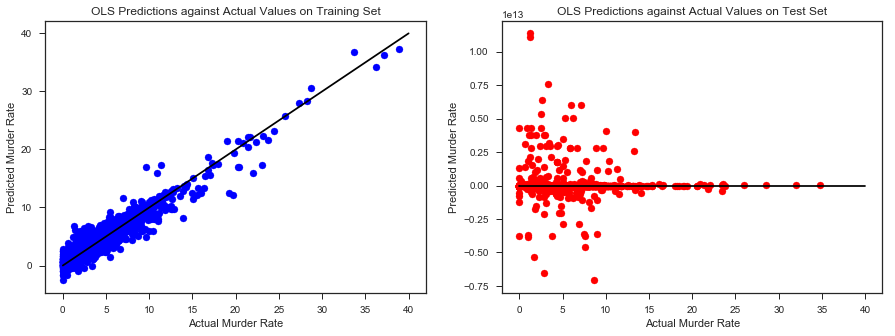

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('OLS Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('OLS Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Ridge with interactions

In [183]:
##Ridge regression
ridge_model = RidgeCV(fit_intercept = True)
ridge_fit = ridge_model.fit(X_train_with_cross, ytrain)
ridge_rsq_train = ridge_model.score(X_train_with_cross, ytrain)
ridge_rsq_test = ridge_model.score(X_test_with_cross, ytest)
print("Ridge Train R-Squared: ",  ridge_rsq_train)
print("Ridge Test R-Squared: ",  ridge_rsq_test)
testpreds =ridge_model.predict(X_test_with_cross)
trainpreds =ridge_model.predict(X_train_with_cross)
ridge_mse_train = np.mean((ytrain - ridge_model.predict(X_train_with_cross))**2)
ridge_mse_test = np.mean((ytest - ridge_model.predict(X_test_with_cross))**2)
print("Ridge Train MSE: ",  ridge_mse_train)
print("Ridge Test MSE: ",  ridge_mse_test)

Ridge Train R-Squared:  0.710637229894
Ridge Test R-Squared:  0.419522098811
Ridge Train MSE:  Murder_Rate    4.693407
dtype: float64
Ridge Test MSE:  Murder_Rate    7.641804
dtype: float64


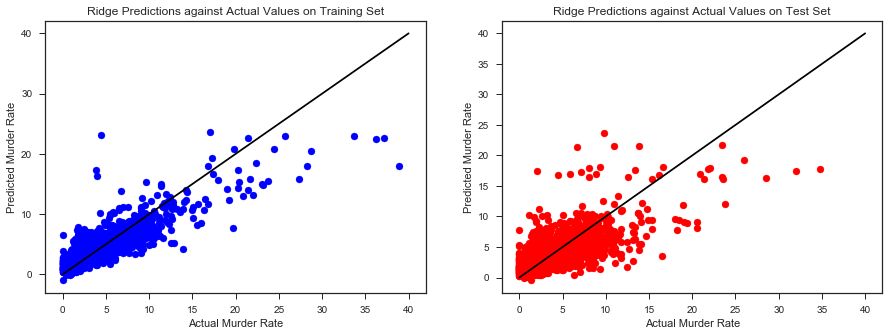

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Ridge Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Ridge Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Lasso with interactions

In [ ]:
## Lasso Regression
from sklearn.linear_model import LassoCV
#
lasso_model = LassoCV(fit_intercept = True, cv=4, max_iter=10000)
lasso_fit = lasso_model.fit(X_train_with_cross, ytrain)
lasso_rsq_train = lasso_model.score(X_train_with_cross, ytrain)
lasso_rsq_test = lasso_model.score(X_test_with_cross, ytest)
print("Lasso Train R-Squared: ",  lasso_rsq_train)
print("Lasso Test R-Squared: ",  lasso_rsq_test)
testpreds = lasso_model.predict(X_test_with_cross)
trainpreds = lasso_model.predict(X_train_with_cross)
lasso_mse_train = np.mean((ytrain.values - testpreds)**2)
lasso_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Lasso Train MSE: ",  lasso_mse_train)
print("Lasso Test MSE: ",  lasso_mse_test)

lasso_coefs = pd.DataFrame({
   "_Lasso" : lasso_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

# note that the parameter for median age has shrunk to zero
lasso_coefs.sort_values('_Lasso', ascending=False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Lasso Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Lasso Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

## Elastic Net with interactions

In [ ]:
## Elastic Regression
from sklearn.linear_model import ElasticNetCV
#
Elastic_model = ElasticNetCV(fit_intercept = True, cv=4, max_iter=10000)
Elastic_fit = Elastic_model.fit(X_train_with_cross, ytrain)
Elastic_rsq_train = Elastic_model.score(X_train_with_cross, ytrain)
Elastic_rsq_test = Elastic_model.score(X_test_with_cross, ytest)
print("Elastic Train R-Squared: ",  Elastic_rsq_train)
print("Elastic Test R-Squared: ",  Elastic_rsq_test)
testpreds = Elastic_model.predict(X_test_with_cross)
trainpreds = Elastic_model.predict(X_train_with_cross)
Elastic_mse_train = np.mean((ytrain.values - testpreds)**2)
Elastic_mse_test = np.mean((ytest.values - trainpreds)**2)
print("Elastic Train MSE: ",  Elastic_mse_train)
print("Elastic Test MSE: ",  Elastic_mse_test)

Elastic_coefs = pd.DataFrame({
   "Coef" : Elastic_model.coef_,
    "Predictors" : X_train_with_cross.columns,
    
})

#Elastic_coefs.sort_values('Coef', ascending=False)

In [ ]:
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')
#boot strap to get standard errors:
#import warnings; warnings.simplefilter('ignore')

train = X_train_with_cross.copy(deep=True)
train['Murder_Rate'] = ytrain.values
boots = []
i=1
while i <= 1000:
    sampdf= train.sample(frac=1, replace=True)
    xsamp = sampdf.drop('Murder_Rate', axis = 1)
    ysamp = sampdf[['Murder_Rate']]
    
    ##run model
    Elastic_model = ElasticNetCV(fit_intercept = True)
    Elastic_fit = Elastic_model.fit(xsamp, ysamp)


    ##results
    boots.append(Elastic_fit.coef_)
    i = i+1

    
bootdf=pd.DataFrame.from_items(zip(X_train_with_cross.columns, boots))
boot_se = bootdf.std(axis=1)
se_df = pd.DataFrame({
    "Predictors" : X_train_with_cross.columns,
   "SE" : boot_se,
    
})



Elastic_coefs = Elastic_coefs.merge(se_df, how='outer', on='Predictors')
Elastic_coefs['t'] = np.abs(np.divide(Elastic_coefs['Coef'].values, Elastic_coefs['SE'].values))
df = X_train_with_cross.shape[0] - X_train_with_cross.shape[1]
Elastic_coefs['p-value'] = Elastic_coefs['t'].map(lambda x: pvalue(x, df)) 
Elastic_coefs.sort_values('Coef', ascending=False)
Elastic_coefs

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(ytrain, trainpreds, color='blue')
ax[0].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[0].set_title('Elastic Net Predictions against Actual Values on Training Set')
ax[0].set_xlabel('Actual Murder Rate')
ax[0].set_ylabel('Predicted Murder Rate')
ax[0].legend(loc='best')

ax[1].scatter(ytest, testpreds, color='red')
ax[1].plot([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40], color = "black")

ax[1].set_title('Elastic Net Predictions against Actual Values on Test Set')
ax[1].set_xlabel('Actual Murder Rate')
ax[1].set_ylabel('Predicted Murder Rate')
ax[1].legend(loc='best')

In [ ]:
# most predictive of higher
print(Elastic_coefs.sort_values('Coef', ascending=False)[0:10].to_latex())

# most predictive of lower
print(Elastic_coefs.sort_values('Coef', ascending=True)[0:10].to_latex(index=False))

# substantive variables
varskeep = ["fop_density", "subsidy_pct", "DEMVOTESHARE", "pct_married", "median_income"]
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="fop_density"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="subsidy_pct"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="DEMVOTESHARE"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="pct_married"].to_latex(index=False))
print(Elastic_coefs.loc[Elastic_coefs["Predictors"]=="median_income"].to_latex(index=False))

# THANK YOU!